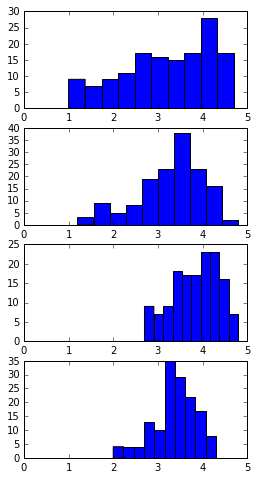

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
movie_reviews = pd.read_csv("fandango_score_comparison.csv")

fig=plt.figure(figsize=(4,8))
ax1=fig.add_subplot(4,1,1)
ax1.set_xlim(0.0,5.0)
ax1.hist(movie_reviews.RT_user_norm)

ax2=fig.add_subplot(4,1,2)
ax2.set_xlim(0.0,5.0)
ax2.hist(movie_reviews.Metacritic_user_nom)

ax3=fig.add_subplot(4,1,3)
ax3.set_xlim(0.0,5.0)
ax3.hist(movie_reviews.Fandango_Ratingvalue)

ax4=fig.add_subplot(4,1,4)
ax4.set_xlim(0.0,5.0)
ax4.hist(movie_reviews.IMDB_norm)

plt.show()

In [2]:
def calc_mean(series):
    summation=sum(series.values)
    mean=summation/len(series)
    
    return mean

user_reviews=movie_reviews[['RT_user_norm','Metacritic_user_nom','Fandango_Ratingvalue','IMDB_norm']]

mean_values=user_reviews.apply(calc_mean,axis=0)

rt_mean=mean_values[0]
mc_mean=mean_values[1]
fg_mean=mean_values[2]
id_mean=mean_values[3]

In [3]:
def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean

def calc_variance(series):
    vals = series.values
    squarediff=0
    for val in vals:
        squarediff+=(val-calc_mean(series))**2
    var=squarediff/len(vals)
    
    return var

rt_var=calc_variance(user_reviews.RT_user_norm)
rt_stdev=(calc_variance(user_reviews.RT_user_norm))**(1/2)

mc_var=calc_variance(user_reviews.Metacritic_user_nom)
mc_stdev=(calc_variance(user_reviews.Metacritic_user_nom))**(1/2)

fg_var=calc_variance(user_reviews.Fandango_Ratingvalue)
fg_stdev=(calc_variance(user_reviews.Fandango_Ratingvalue))**(1/2)

id_var=calc_variance(user_reviews.IMDB_norm)
id_stdev=(calc_variance(user_reviews.IMDB_norm))**(1/2)

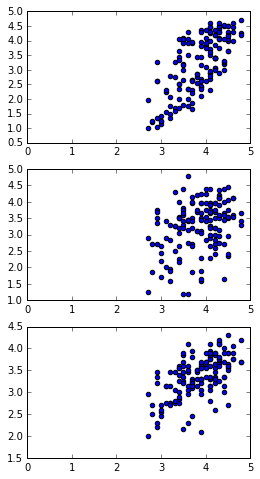

In [4]:
fig=plt.figure(figsize=(4,8))

ax1=fig.add_subplot(3,1,1)
ax1.set_xlim(0.0,5.0)
ax1.scatter(movie_reviews.Fandango_Ratingvalue,movie_reviews.RT_user_norm)

ax2=fig.add_subplot(3,1,2)
ax2.set_xlim(0.0,5.0)
ax2.scatter(movie_reviews.Fandango_Ratingvalue,movie_reviews.Metacritic_user_nom)

ax3=fig.add_subplot(3,1,3)
ax3.set_xlim(0.0,5.0)
ax3.scatter(movie_reviews.Fandango_Ratingvalue,movie_reviews.IMDB_norm)

In [5]:
def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean
    
def calc_covariance(seriesx,seriesy):
    x_mean=calc_mean(seriesx)
    y_mean=calc_mean(seriesy)
   
    xdiff=[val-x_mean for val in seriesx.values]
    ydiff=[val-y_mean for val in seriesy.values]
    
    products=[xdiff[i]*ydiff[i] for i in range(0,len(xdiff))]
   
    covar=sum(products)/len(seriesx)
    
    return covar
    
rt_fg_covar=calc_covariance(movie_reviews.RT_user_norm,movie_reviews.Fandango_Ratingvalue)
mc_fg_covar=calc_covariance(movie_reviews.Metacritic_user_nom,movie_reviews.Fandango_Ratingvalue)
id_fg_covar=calc_covariance(movie_reviews.IMDB_norm,movie_reviews.Fandango_Ratingvalue)
    